In [1]:
import numpy as np
from scipy import interpolate

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
x=np.linspace(5.0,150.0,300)

# Summary

The input gas flow rate calculated from the flow rate of the two indivual rotameter agrees within a sigma with the one calculated from gas mixture flow rate. This value is between 650 and 680 sccm. The return fraction after the two detectors in series is about 40%. The quencher fraction is 2% below the target.

# Calibration

## Setup for atmosphere Argon and Stainless Steel ball

https://www.mathesongas.com/pdfs/flowchart/602%20(E300)/ARGON%20602(E300)%20SS%200%20PSIG.pdf

$\phi_{\text{Ar}}(z)$

In [3]:
ro,cal=np.loadtxt('ARGON_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
arflow=interpolate.interp1d(ro, cal)

## Setup for atmosphere Carbon Dioxide and Glass ball
https://www.mathesongas.com/pdfs/flowchart/602%20(E300)/CARBON%20DIOXIDE%20602(E300)%20GLASS%200%20PSIG.pdf

$\phi_{\text{CO}_2}(z)$

In [4]:
ro,cal=np.loadtxt('CARBON_DIOXIDE_602(E300)_GLASS_0_PSIG.dat',unpack=True) # sccm
co2flow=interpolate.interp1d(ro, cal)

## Plots

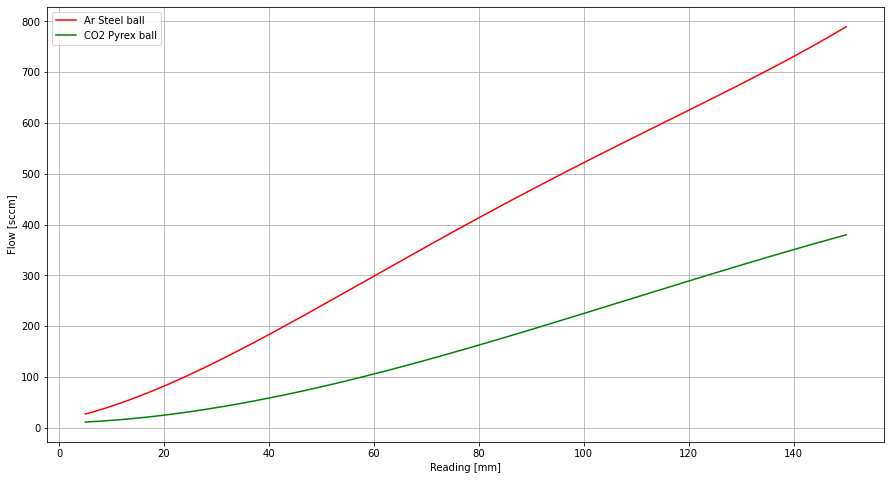

In [5]:
plt.plot(x, arflow(x), 'r', label='Ar Steel ball')
plt.plot(x, co2flow(x),'g', label='CO2 Pyrex ball')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

# Determination of the flow prior to mixing

Carbon Dioxide flow $\phi_{\text{CO}_2}(z_1)$ for reading $z_1$

*pic goes here*

In [6]:
z1=85 # reading of glass ball
inCO2Flow=co2flow(z1)
print(f'CO2 inflow {inCO2Flow:.0f} sccm')

CO2 inflow 178 sccm


Argon flow $\phi_{\text{Ar}}(z_2)$ for reading $z_2$

*pic goes here*

In [7]:
z2=90 # reading of stainless stell ball
inArFlow=arflow(z2)
print(f'Ar inflow {inArFlow:.0f} sccm')

Ar inflow 469 sccm


Total flow prior to mixing $\phi_{\text{sum}}=\phi_{\text{CO}_2}(z_1)+\phi_{\text{Ar}}(z_2)$

In [8]:
totFlow=inCO2Flow+inArFlow
print(f'Total input Flow {totFlow:.0f} sccm')

Total input Flow 647 sccm


Calculate CO$_2$ fraction $f_{\text{CO}_2}=\tfrac{\phi_{\text{CO}_2}(z_1)}{\phi_{\text{sum}}}$

In [9]:
co2frac=inCO2Flow/totFlow
print(f'CO2 fraction {co2frac*100:.0f}%')

CO2 fraction 28%


## Error Estimation

This document

https://www.mathesongas.com/sites/default/files/inline-files/Model-FM-1050-High-Accuracy-Flowmeters.pdf

reports that the accuracy of the tube is $\pm5\%$ of full scale flow rate.

The full scale rate for Argon using the calibration above is 790 sccm

In [10]:
Arerr=790.*0.05
print(f'Argon flow rate measurement accuracy: {Arerr:.1f}sccm')

Argon flow rate measurement accuracy: 39.5sccm


The full scale rate for Argon using the calibration above is 380 sccm

In [11]:
CO2err=380.*0.05
print(f'Carbon Dioxide flow rate measurement accuracy: {CO2err:.1f}sccm')

Carbon Dioxide flow rate measurement accuracy: 19.0sccm


Therefore the total flow rate is 

In [12]:
totErr=Arerr+CO2err
print(f'({totFlow:.0f} +/- {totErr:.0f}) sccm')

(647 +/- 58) sccm


# Determination of the flow of a gas mixture

Calculate correction for different gas mixture

https://www.mathesongas.com/pdfs/flowchart/RotameterGasFactorChart.pdf

In [13]:
Ar_factor=0.851
CO2_factor=0.808

Mixture fraction $f_{\text{Ar}}=1-f_{\text{CO}_2}$

In [14]:
q_frac=co2frac

In [15]:
mix_factor=((1.0-q_frac)*Ar_factor)+(q_frac*CO2_factor)
print(f'mix factor: {mix_factor:.5f}')

mix factor: 0.83916


Setup for atmosphere Air and Stainless Steel ball

https://www.mathesongas.com/pdfs/flowchart/602%20(E300)/AIR%20602(E300)%20SS%200%20PSIG.pdf


In [16]:
ro,cal=np.loadtxt('AIR_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
airflow = interpolate.interp1d(ro, cal)

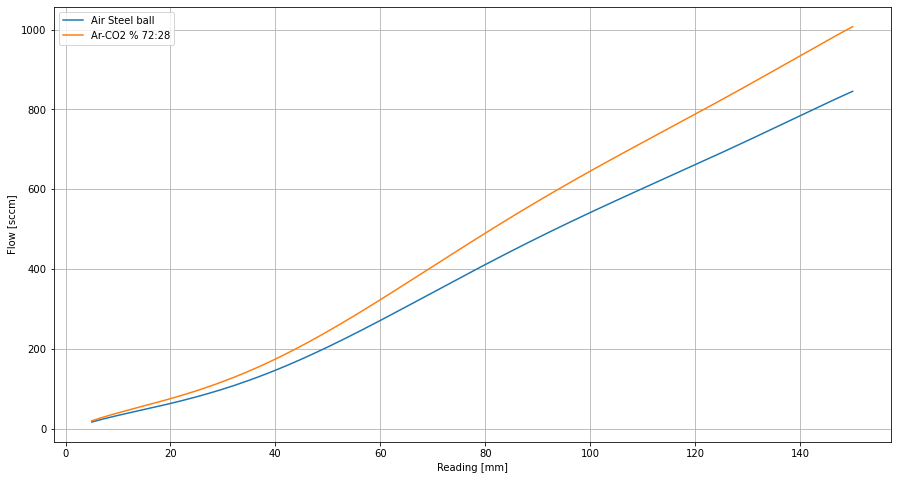

In [17]:
plt.plot(x, airflow(x), label='Air Steel ball')
plt.plot(x, airflow(x)/mix_factor, label=f'Ar-CO2 % {(1.-q_frac)*100:1.0f}:{q_frac*100:1.0f}')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

Readout of the SS ball

In [18]:
inSS=105
outSS=55

Determine input flow post mixing

In [19]:
inFlow=airflow(inSS)/mix_factor
print(f'Gas Mixture inflow {inFlow:.0f} sccm')

Gas Mixture inflow 682 sccm


Determine output flow

In [20]:
outFlow=airflow(outSS)/mix_factor
print(f'Gas Mixture outflow {outFlow:.0f} sccm')

Gas Mixture outflow 282 sccm


Determine return fraction

In [21]:
print(f'Return fraction {outFlow/inFlow*100.0:.1f}%')

Return fraction 41.4%


## Error Estimation

The full scale rate for the gas mixture using the calibration above is the following:

In [22]:
mix_maxrate=airflow(150.)/mix_factor
print(f'Max flow rate for mixture {mix_maxrate:.0f} sccm')

Max flow rate for mixture 1007 sccm


Therefore the input and output flow rate of the mixture are

In [23]:
mixerr=mix_maxrate*0.05
print(f'Input: ({inFlow:.0f} +/- {mixerr:.0f}) sccm')
print(f'Output: ({outFlow:.0f} +/- {mixerr:.0f}) sccm')

Input: (682 +/- 50) sccm
Output: (282 +/- 50) sccm
